In [2]:
import pandas as pd
import statistics as sts
import seaborn as srn

In [18]:
# Importando dados
dataset = pd.read_csv('tempo.csv', sep=';')

#Visualizando
dataset.head()


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [40]:
dataset.shape

(14, 5)

GRAFICOS

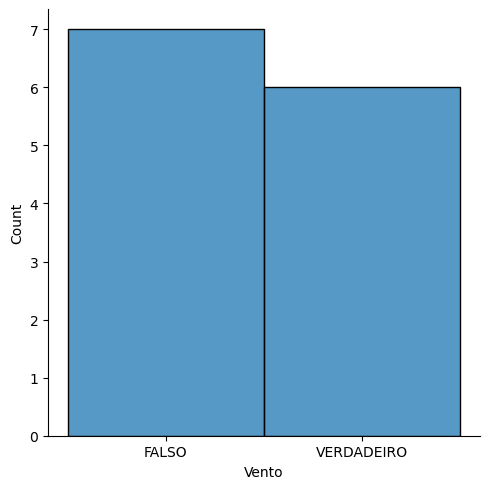

In [80]:
srn.displot(dataset["Vento"]).set_titles("Vento")

Text(0.5, 1.0, 'Vento')

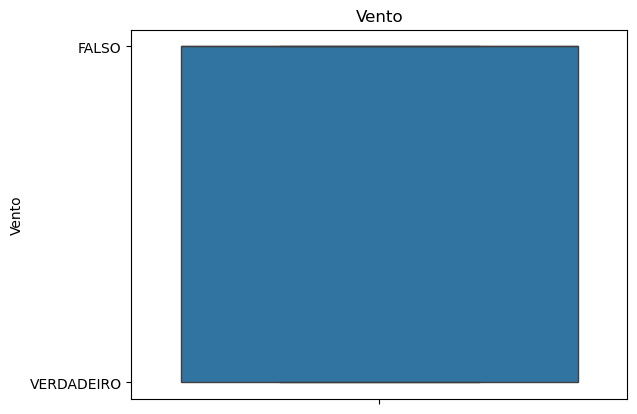

In [79]:
srn.boxplot(dataset["Vento"]).set_title("Vento")

Text(0.5, 1.0, 'Aparencia')

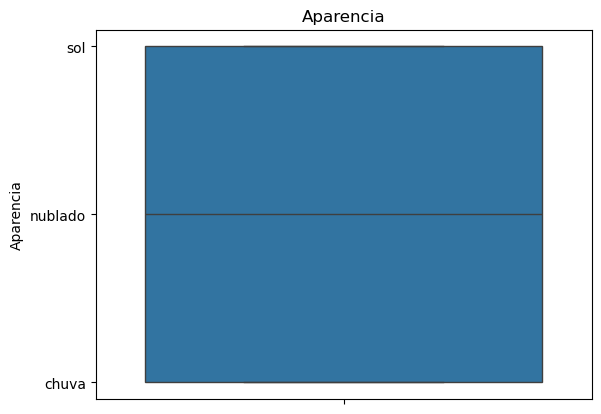

In [78]:
srn.boxplot(dataset["Aparencia"]).set_title("Aparencia")

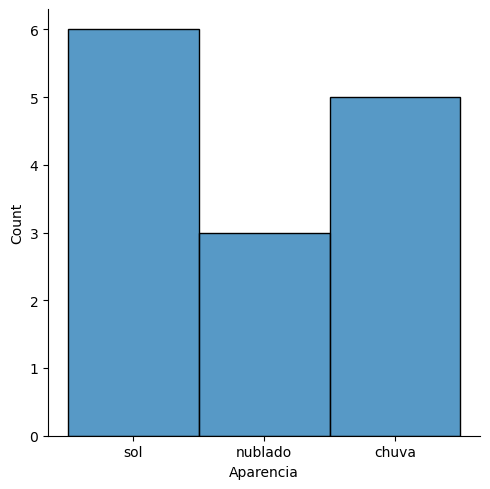

In [77]:
srn.displot(dataset["Aparencia"]).set_titles("Aparencia")

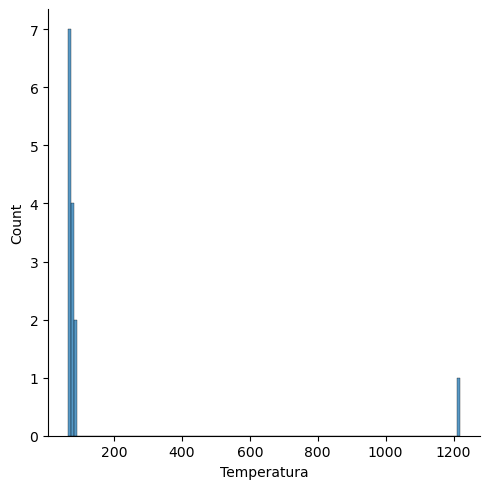

In [58]:
srn.displot(dataset["Temperatura"]).set_titles("Temperatura")

Text(0.5, 1.0, 'Temperatura')

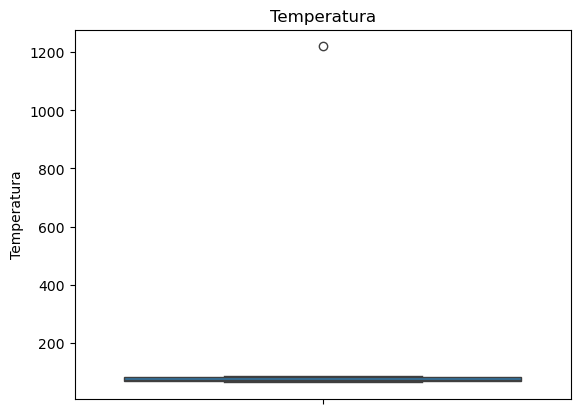

In [42]:
srn.boxplot(dataset["Temperatura"]).set_title("Temperatura")

Text(0.5, 1.0, 'Umidade')

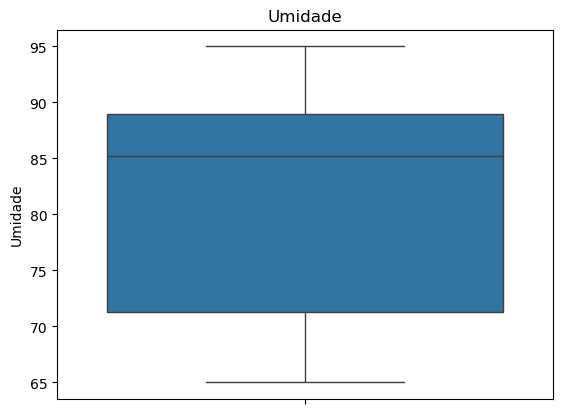

In [59]:
srn.boxplot(dataset["Umidade"]).set_title("Umidade")

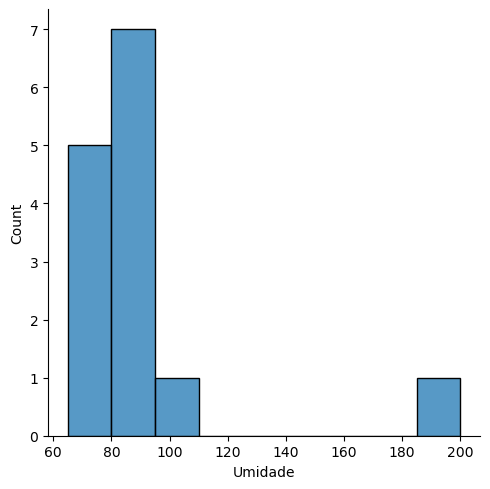

In [43]:
srn.displot(dataset["Umidade"]).set_titles("Umidade")

TRATANDO DADOS 


Verificando

In [25]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

Tratando

In [24]:
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

UMIDADE

In [37]:
mediana = sts.median(dataset["Umidade"])
mediana

85.5

In [39]:
dataset.fillna({"Umidade": mediana}, inplace=True)

In [ ]:
#Verificando umidade 
dataset.loc[(dataset["Umidade"] < 0) | (dataset["Umidade"] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,NaN,sim


In [51]:
#Substituindo valor > 200 ou < 0
dataset.loc[(dataset["Umidade"] < 0 ) | (dataset["Umidade"] > 100), "Umidade"] = mediana

#Verificando
dataset.loc[(dataset["Umidade"] < 0 ) | (dataset["Umidade"] > 100)] 

,Aparencia,Temperatura,Umidade,Vento,Jogar


JOGAR

In [ ]:
# ESTÁ OK
agrupado = dataset.groupby(["Jogar"]).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

TEMPERATURA

In [57]:
agrupado = dataset.groupby(["Temperatura"]).size()
agrupado

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [62]:
dataset["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [64]:
# Mudando o valor exagerado para 0 para que a media saia entre 130 e -130
dataset.loc[dataset["Temperatura"] == 1220, "Temperatura"] = 0

In [65]:
# Definindo a media
media = sts.mean(dataset["Temperatura"])
media

68.42857142857143

In [68]:
dataset.loc[dataset["Temperatura"] == 1220, "Temperatura"] = media
dataset["Temperatura"].describe()

count    14.000000
mean     68.428571
std      20.757628
min       0.000000
25%      68.250000
50%      71.500000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

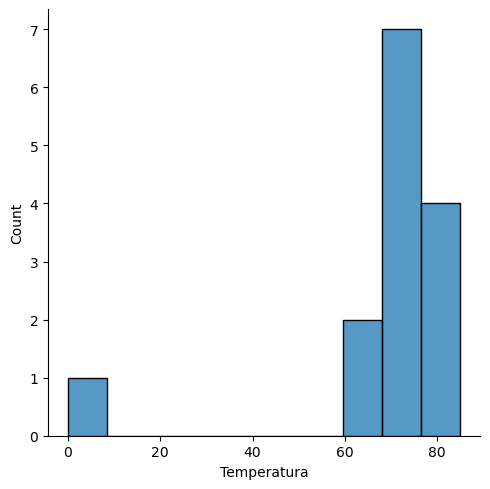

In [69]:
srn.displot(dataset["Temperatura"]).set_titles("Temperaturas")

Text(0.5, 1.0, 'Temperatura')

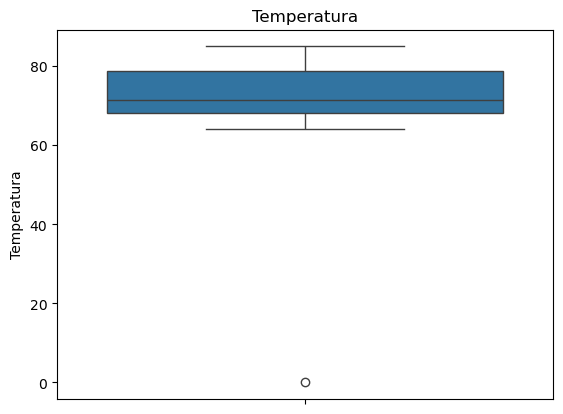

In [82]:
srn.boxplot(dataset["Temperatura"]).set_title("Temperatura")

In [70]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


APARENCIA

In [71]:
agrupado = dataset.groupby(["Aparencia"]).size() 
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [73]:
# Mudando celula menos para a moda (SOL)
# gerando moda (para ter certeza que é sol)
moda = sts.mode(dataset["Aparencia"])
moda

'sol'

In [75]:
#substituindo
dataset.loc[dataset["Aparencia"] == 'menos', "Aparencia"] = moda


In [76]:
agrupado = dataset.groupby(["Aparencia"]).size() 
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

VENTO

In [81]:
agrupado = dataset.groupby(["Vento"]).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [83]:
dataset["Vento"].isnull().sum()

np.int64(1)

In [84]:
dataset.loc[dataset["Vento"].isnull(), "Vento"] = "FALSO"

In [85]:
agrupado = dataset.groupby(["Vento"]).size()
agrupado

Vento
FALSO         8
VERDADEIRO    6
dtype: int64